## FILTROS

SEÑAL DE PULGAR CON OPOSICIÓN

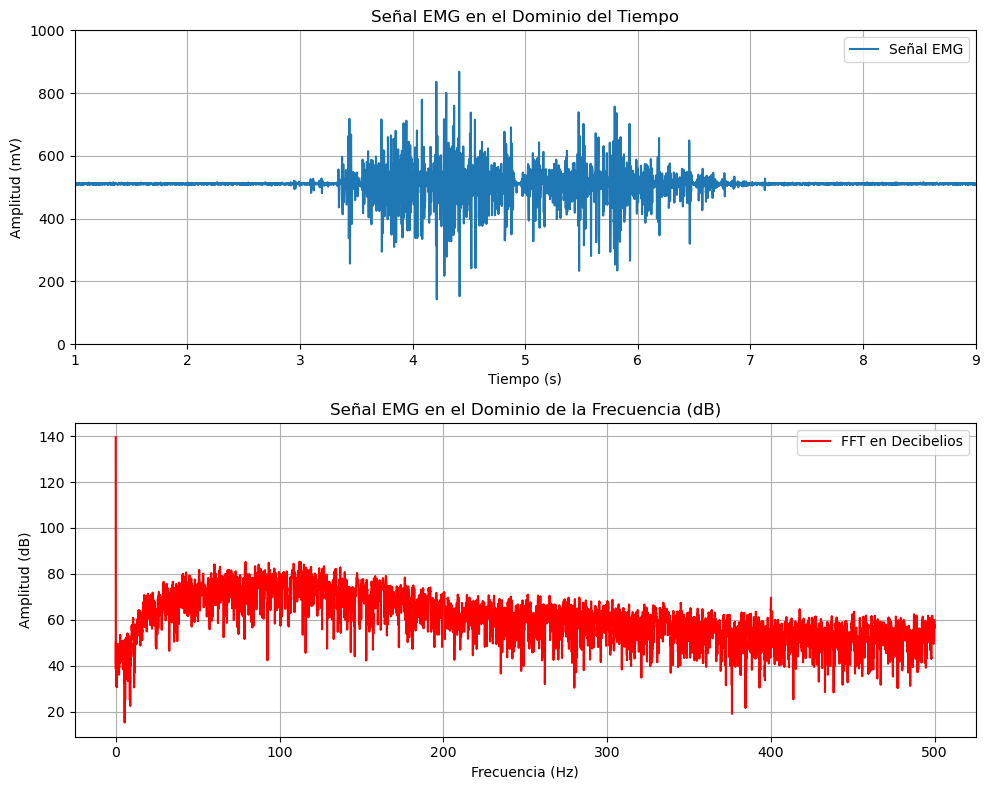

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/Valeria Chavez/OneDrive/Escritorio/Signals/sEMG_signals/DedoPulgar/dedo_contrs.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([1, 9])
ax1.set_ylim([0, 1000])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()

SEÑAL DE PULGAR CON OPOSICIÓN FILTRADA

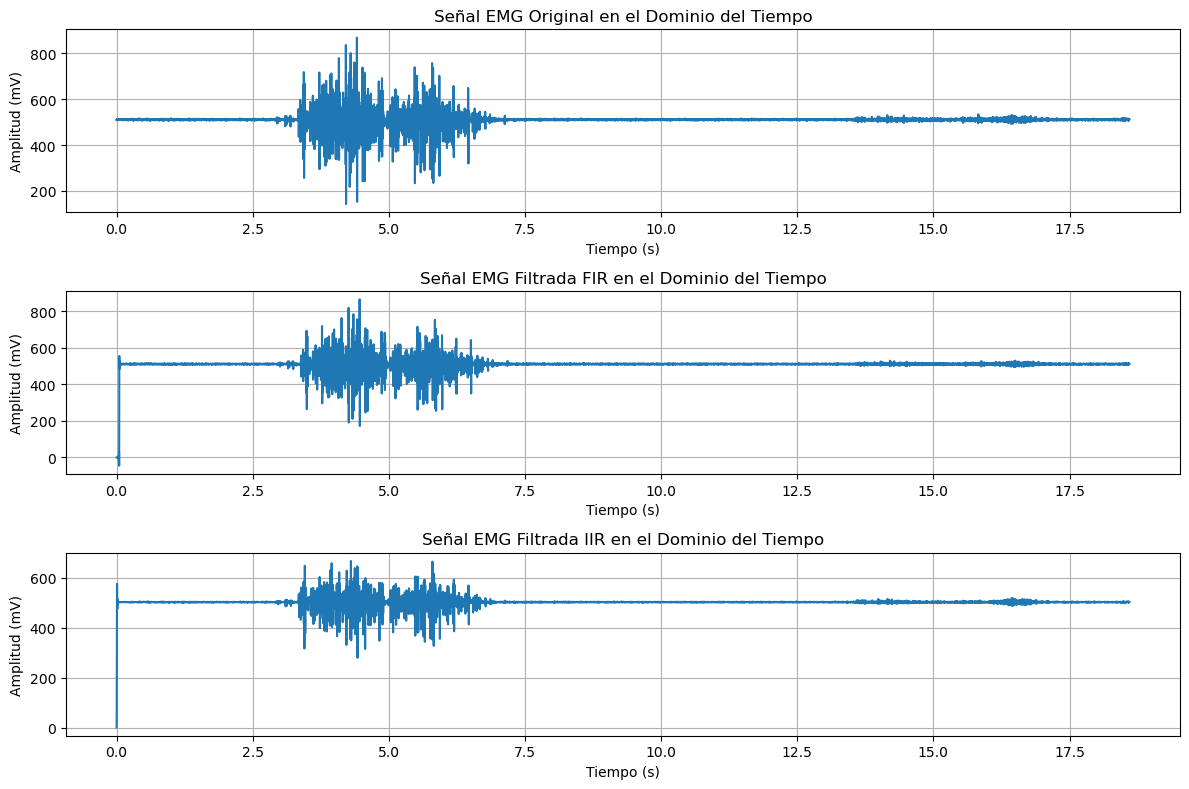

In [35]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


# Coeficientes del filtro FIR obtenidos de PyFDA
b_fir = [-5.336E-05, 7.530E-06, 8.535E-05, -5.562E-05, -1.224E-04, 1.385E-04, 1.495E-04,
     -2.822E-04, -1.181E-04, 4.680E-04, 1.121E-06, -6.850E-04, 2.570E-04, 8.695E-04,
     -6.756E-04, -9.528E-04, 1.269E-03, 8.222E-04, -1.989E-03, -3.758E-04, 2.748E-03,
     -4.917E-04, -3.380E-03, 1.827E-03, 3.676E-03, -3.619E-03, -3.376E-03, 5.741E-03,
     2.227E-03, -7.958E-03, 2.535E-06, 9.900E-03, -3.453E-03, -1.109E-02, 8.155E-03,
     1.094E-02, -1.398E-02, -8.775E-03, 2.064E-02, 3.822E-03, -2.770E-02, 4.947E-03,
     3.463E-02, -1.929E-02, -4.083E-02, 4.349E-02, 4.575E-02, -9.337E-02, -4.891E-02,
     3.140E-01, 5.500E-01, 3.140E-01, -4.891E-02, -9.337E-02, 4.575E-02, 4.349E-02,
     -4.083E-02, -1.929E-02, 3.463E-02, 4.947E-03, -2.770E-02, 3.822E-03, 2.064E-02,
     -8.775E-03, -1.398E-02, 1.094E-02, 8.155E-03, -1.109E-02, -3.453E-03, 9.900E-03,
     2.535E-06, -7.958E-03, 2.227E-03, 5.741E-03, -3.376E-03, -3.619E-03, 3.676E-03,
     1.827E-03, -3.380E-03, -4.917E-04, 2.748E-03, -3.758E-04, -1.989E-03, 8.222E-04,
     1.269E-03, -9.528E-04, -6.756E-04, 8.695E-04, 2.570E-04, -6.850E-04, 1.121E-06,
     4.680E-04, -1.181E-04, -2.822E-04, 1.495E-04, 1.385E-04, -1.224E-04, -5.562E-05,
     8.535E-05, 7.530E-06, -5.336E-05]
a_fir = [1]  # Para FIR, el valor de a siempre es 1

# Coeficientes del filtro IIR obtenidos de PyFDA
b_iir = [0.001283, 0.006413, 0.01283, 0.01283, 0.006413, 0.001283]
a_iir = [1, -2.975, 3.806, -2.545, 0.8811, -0.1254]

# Filtrar la señal con el filtro FIR
filtered_signal_fir = signal.lfilter(b_fir, a_fir, emg_signal)

# Filtrar la señal con el filtro IIR
filtered_signal_iir = signal.lfilter(b_iir, a_iir, emg_signal)

# Frecuencia de muestreo
sampling_rate = 1000  # Hz
n_samples = len(emg_signal)
time = np.arange(n_samples) / sampling_rate

# Aplicar el filtro FIR y IIR
filtered_signal_fir = signal.lfilter(b_fir, a_fir, emg_signal)
filtered_signal_iir = signal.lfilter(b_iir, a_iir, emg_signal)

# Graficar las señales en el dominio del tiempo
plt.figure(figsize=(12, 8))

# Señal original en el dominio del tiempo
plt.subplot(3, 1, 1)
plt.plot(time, emg_signal)
plt.title("Señal EMG Original en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.grid(True)

# Señal filtrada FIR en el dominio del tiempo
plt.subplot(3, 1, 2)
plt.plot(time, filtered_signal_fir)
plt.title("Señal EMG Filtrada FIR en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.grid(True)

# Señal filtrada IIR en el dominio del tiempo
plt.subplot(3, 1, 3)
plt.plot(time, filtered_signal_iir)
plt.title("Señal EMG Filtrada IIR en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.grid(True)

plt.tight_layout()
plt.show()


SEÑALES (SIN FILTRAR Y FILTRADAS): EN DOMINIO DE TIEMPO, FRECUENCIA Y STFT

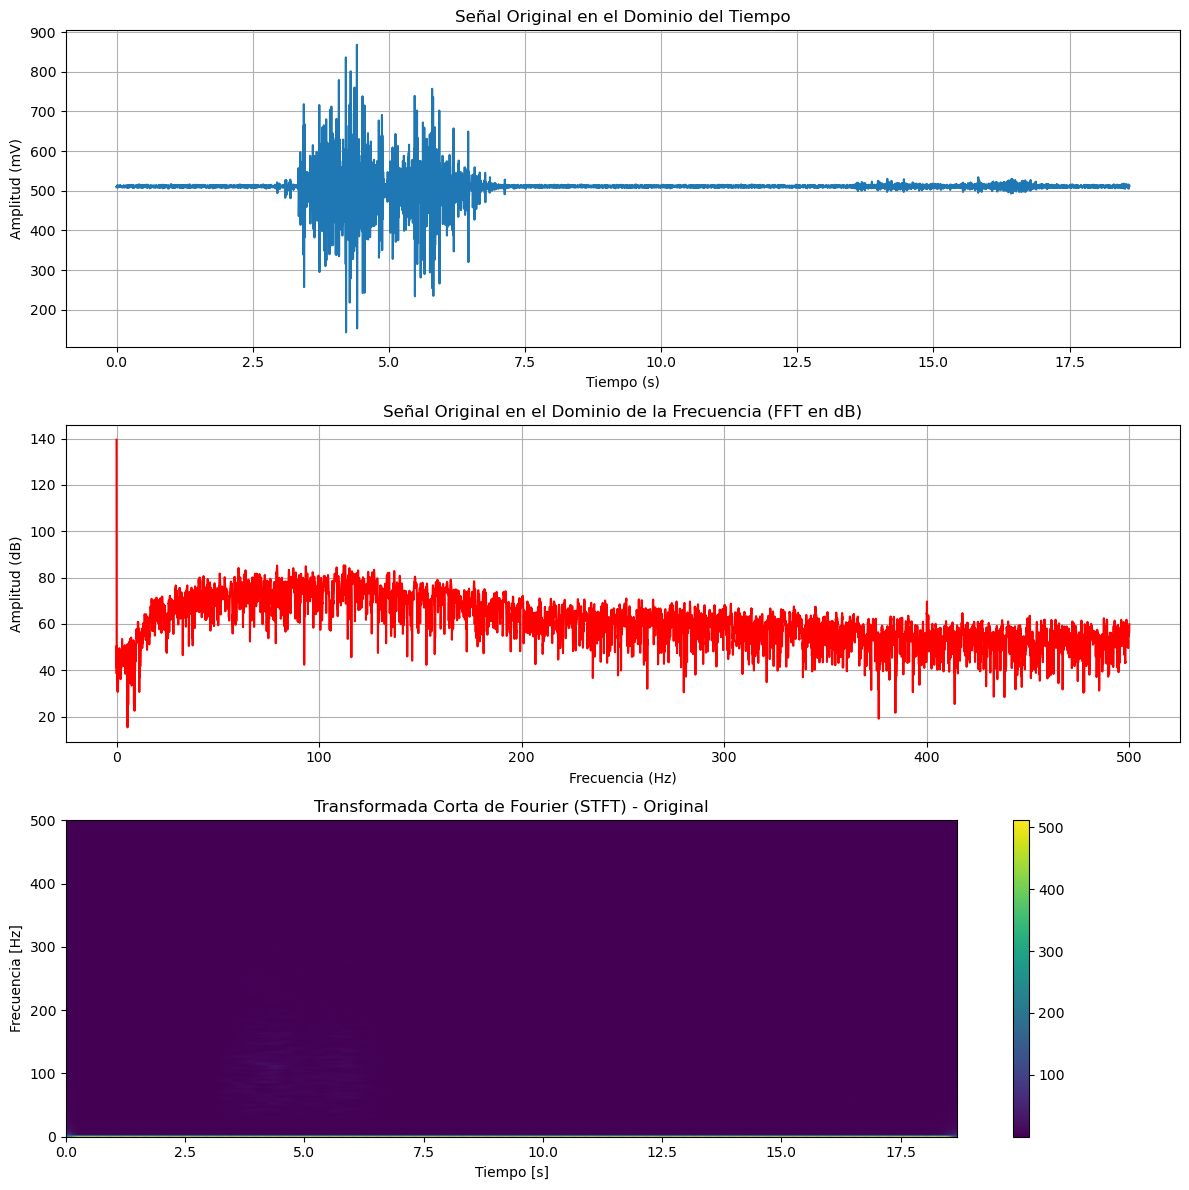

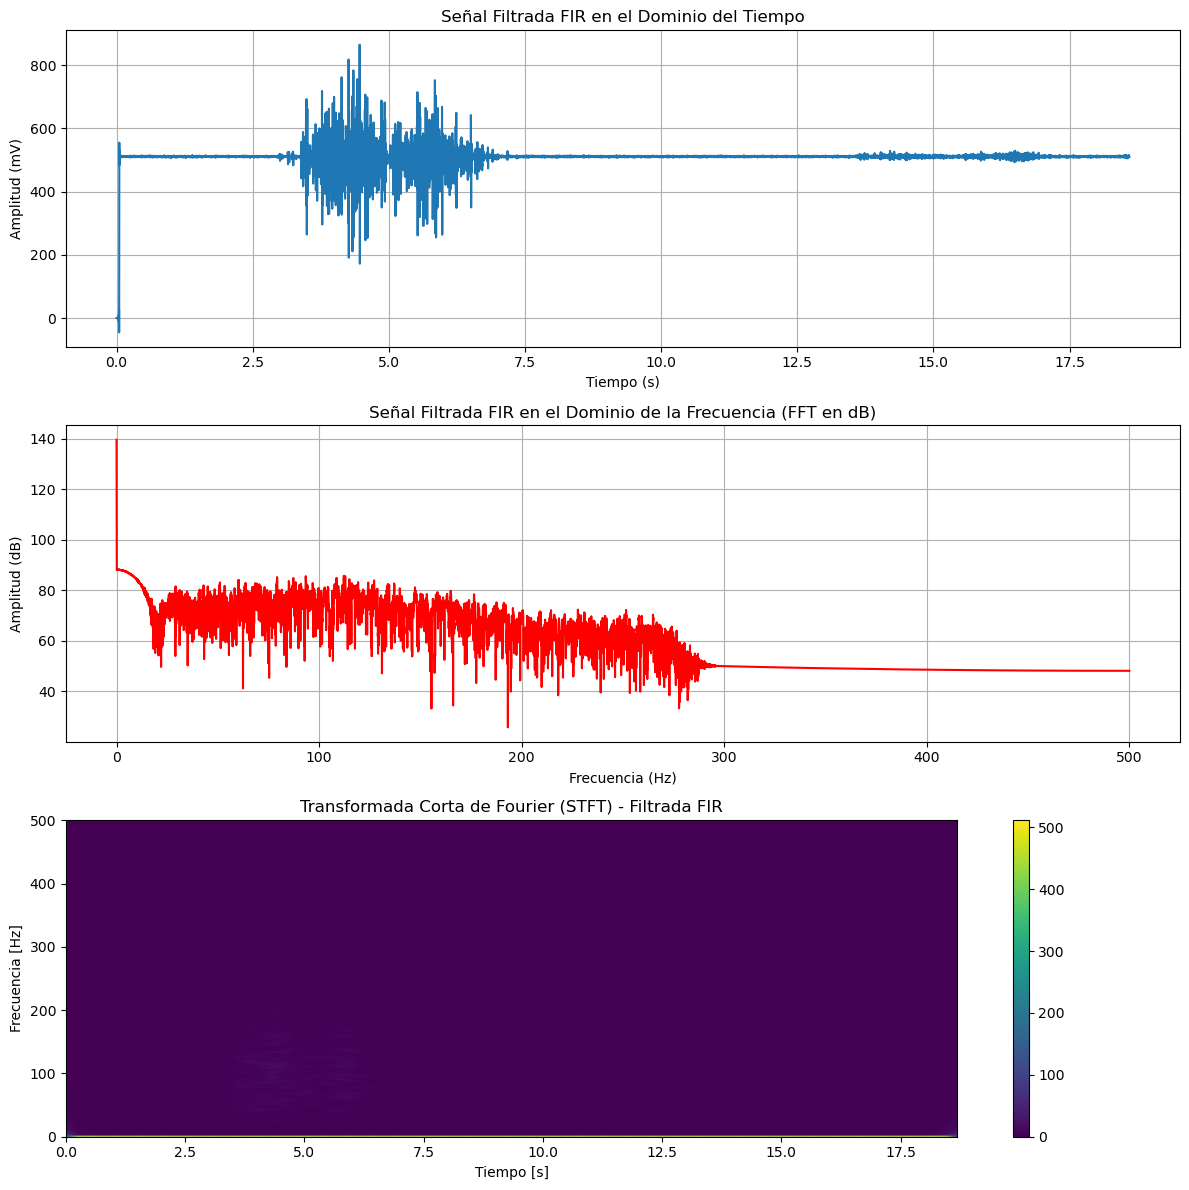

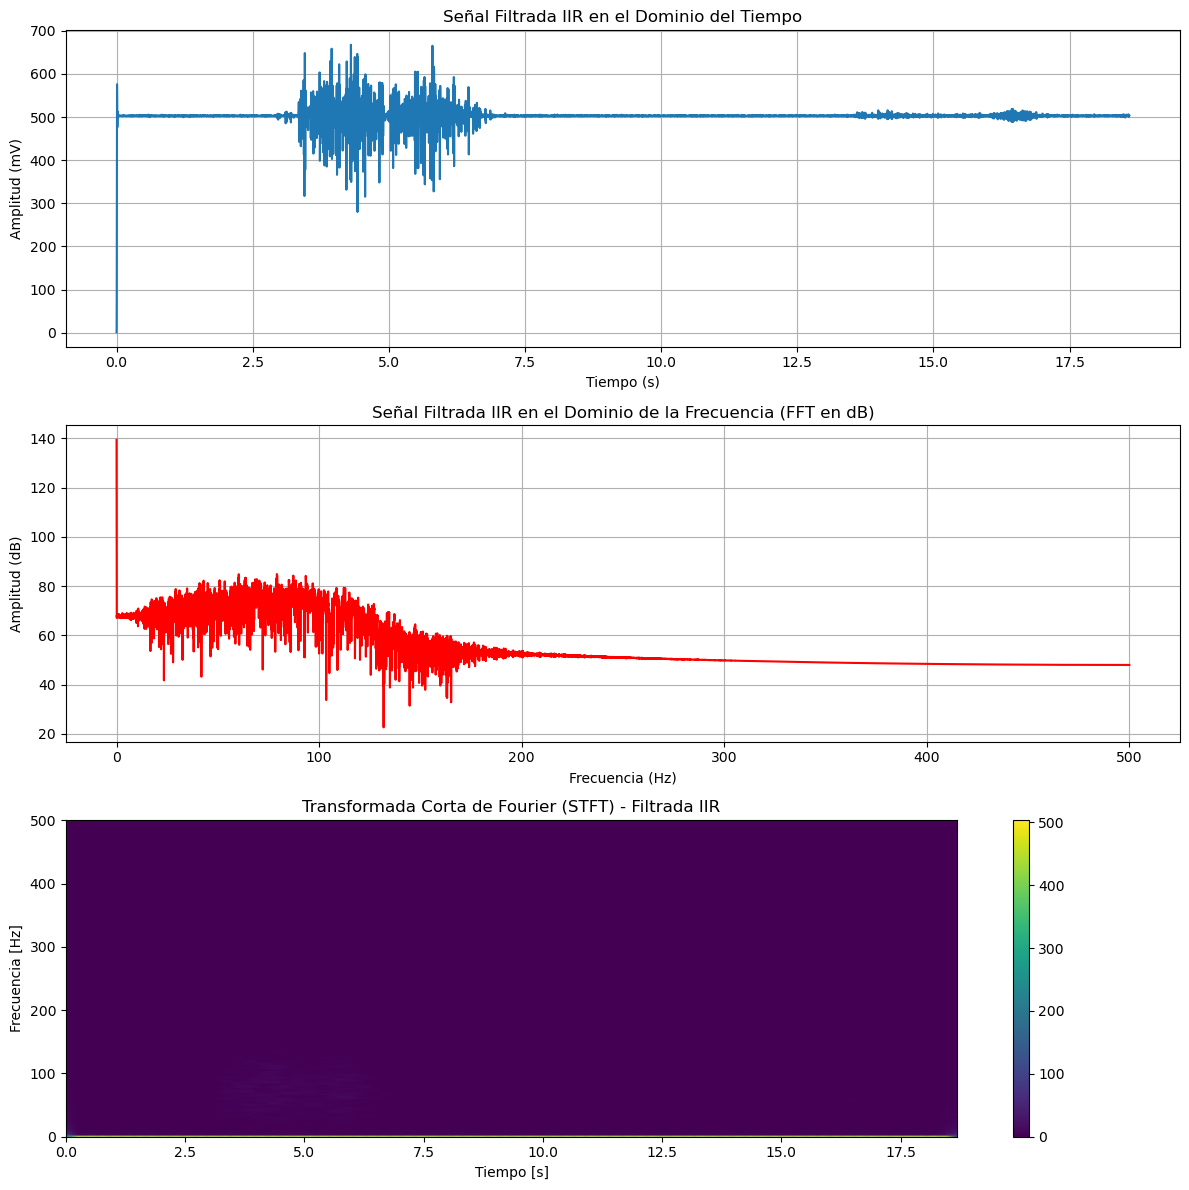

In [34]:
# Frecuencia de muestreo
sampling_rate = 1000  # Hz
n_samples = len(emg_signal)
time = np.arange(n_samples) / sampling_rate

# Aplicar el filtro FIR y IIR
filtered_signal_fir = signal.lfilter(b_fir, a_fir, emg_signal)
filtered_signal_iir = signal.lfilter(b_iir, a_iir, emg_signal)

# Función para calcular la FFT
def calculate_fft(signal_data, sampling_rate):
    n_samples = len(signal_data)
    signal_fft = fft(signal_data)
    frequencies = fftfreq(n_samples, 1/sampling_rate)
    fft_magnitude = np.abs(signal_fft[:n_samples // 2])
    return frequencies[:n_samples // 2], fft_magnitude

# Función para la STFT (Short-Time Fourier Transform)
def plot_stft(signal_data, sampling_rate, title):
    f, t, Zxx = signal.stft(signal_data, fs=sampling_rate, nperseg=512)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.colorbar()
    plt.tight_layout()

# Graficar las señales en los tres dominios: Tiempo, Frecuencia (FFT) y STFT
signals = {
    "Original": emg_signal,
    "Filtrada FIR": filtered_signal_fir,
    "Filtrada IIR": filtered_signal_iir
}

for key, signal_data in signals.items():
    plt.figure(figsize=(12, 12))
    
    # Gráfico en el dominio del tiempo
    plt.subplot(3, 1, 1)
    plt.plot(time, signal_data)
    plt.title(f"Señal {key} en el Dominio del Tiempo")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (mV)")
    plt.grid(True)

    # Gráfico en el dominio de la frecuencia (FFT)
    plt.subplot(3, 1, 2)
    frequencies, fft_magnitude = calculate_fft(signal_data, sampling_rate)
    plt.plot(frequencies, 20 * np.log10(fft_magnitude), color='r'),
    plt.title(f"Señal {key} en el Dominio de la Frecuencia (FFT en dB)")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud (dB)")
    plt.grid(True)

    # Transformada corta de Fourier (STFT)
    plt.subplot(3, 1, 3)
    plot_stft(signal_data, sampling_rate, f"Transformada Corta de Fourier (STFT) - {key}")
    
    plt.tight_layout()
    plt.show()


Diagramas de polos y ceros 

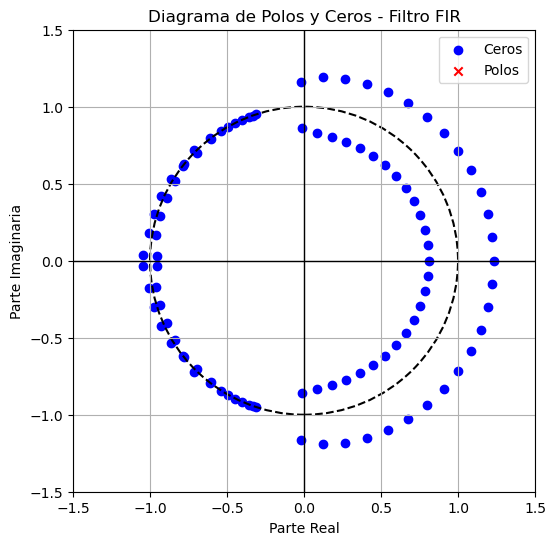

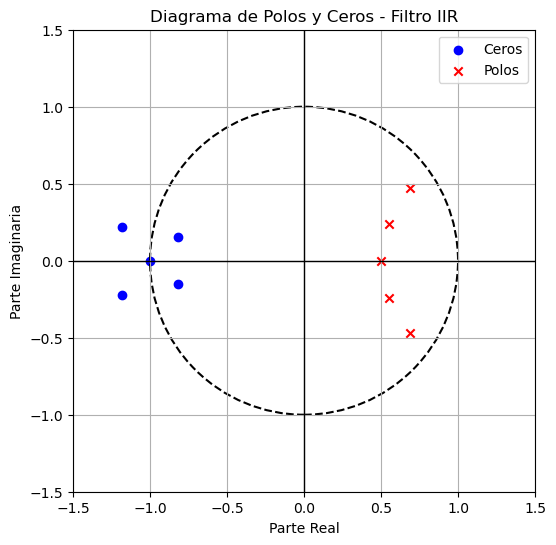

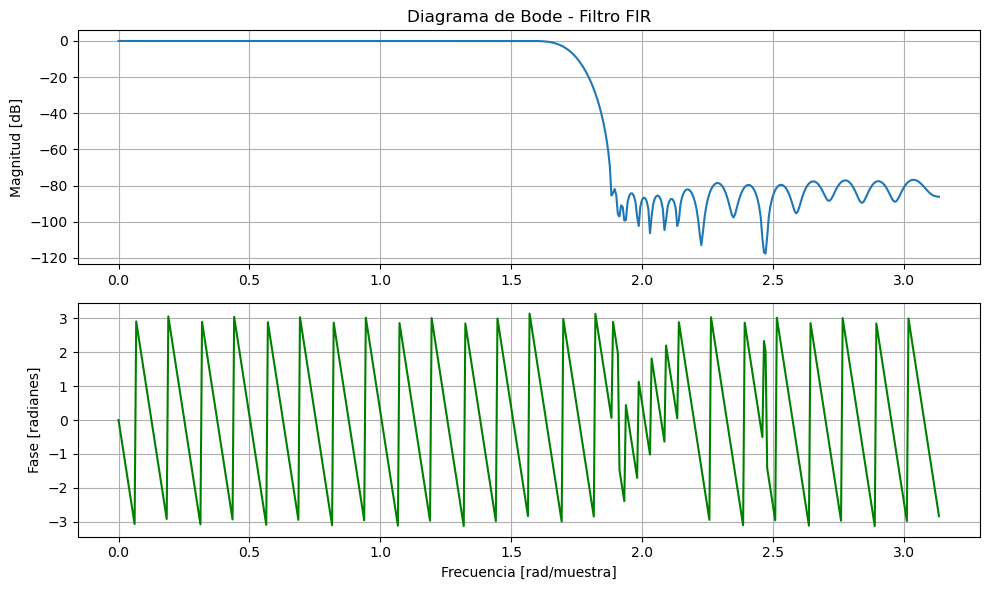

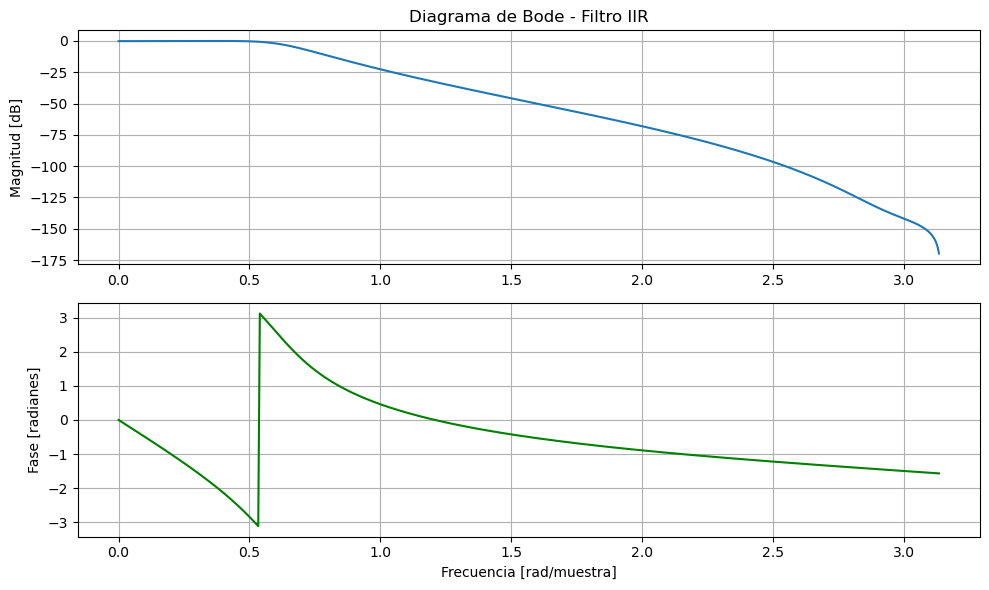

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Función para el diagrama de polos y ceros con círculo unitario
def plot_poles_zeros(b, a, title):
    z, p, _ = signal.tf2zpk(b, a)  # Calcular polos y ceros
    plt.figure(figsize=(6, 6))
    
    # Graficar los ceros
    plt.scatter(np.real(z), np.imag(z), marker='o', label='Ceros', color='b')
    
    # Graficar los polos
    plt.scatter(np.real(p), np.imag(p), marker='x', label='Polos', color='r')
    
    # Agregar el círculo unitario
    unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', linewidth=1.5)
    plt.gca().add_artist(unit_circle)

    # Configurar el gráfico
    plt.axvline(0, color='k', lw=1)
    plt.axhline(0, color='k', lw=1)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title(f"Diagrama de Polos y Ceros - {title}")
    plt.xlabel("Parte Real")
    plt.ylabel("Parte Imaginaria")
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Función para el diagrama de Bode
def plot_bode(b, a, title):
    w, h = signal.freqz(b, a)  # Respuesta en frecuencia
    plt.figure(figsize=(10, 6))

    # Magnitud en decibelios
    plt.subplot(2, 1, 1)
    plt.plot(w, 20 * np.log10(abs(h)), label="Magnitud")
    plt.title(f"Diagrama de Bode - {title}")
    plt.ylabel("Magnitud [dB]")
    plt.grid(True)

    # Fase
    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h), label="Fase", color='g')
    plt.xlabel("Frecuencia [rad/muestra]")
    plt.ylabel("Fase [radianes]")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Graficar los polos y ceros del filtro FIR
plot_poles_zeros(b_fir, a_fir, "Filtro FIR")

# Graficar los polos y ceros del filtro IIR
plot_poles_zeros(b_iir, a_iir, "Filtro IIR")

# Graficar el diagrama de Bode del filtro FIR
plot_bode(b_fir, a_fir, "Filtro FIR")

# Graficar el diagrama de Bode del filtro IIR
plot_bode(b_iir, a_iir, "Filtro IIR")

Filtro FIR

La principal ventaja de los filtros FIR es que tienen fase lineal, lo que significa que no distorsionan la fase de las señales filtradas.
El filtro FIR, a pesar de ser preciso en mantener la forma de la señal, tiene este transitorio al inicio, que se puede mitigar eliminando los primeros puntos de la señal filtrada o aumentando el orden del filtro.


Filtro IIR
Filtro IIR (Infinite Impulse Response), tipo Butterworth.
Los filtros IIR son más eficientes computacionalmente, ya que pueden lograr la misma atenuación que un FIR con un orden más bajo.
Los filtros IIR pueden tener distorsión de fase, lo que podría afectar la señal EMG en estudios donde la fase es crítica.

Reposo basal post respiración - Primera derivada

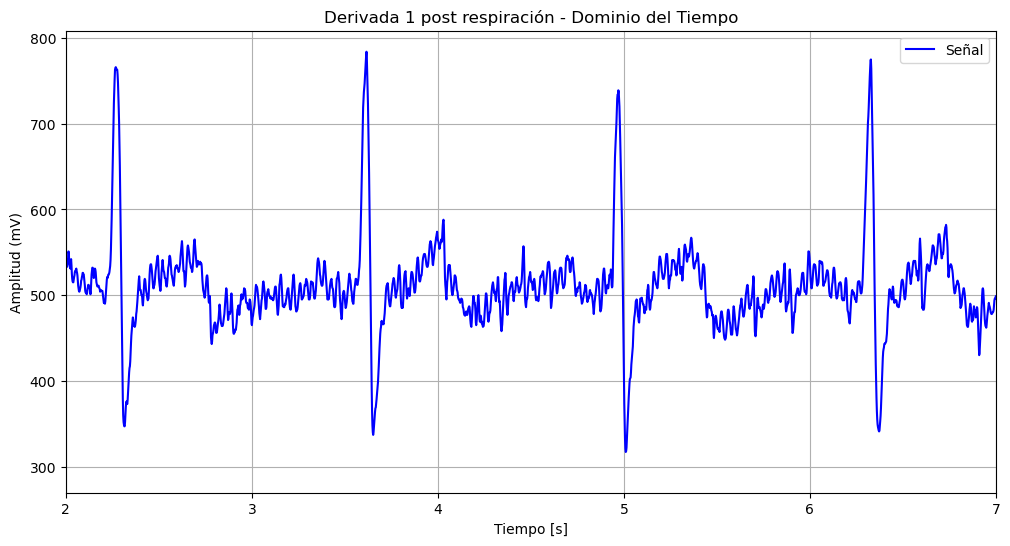

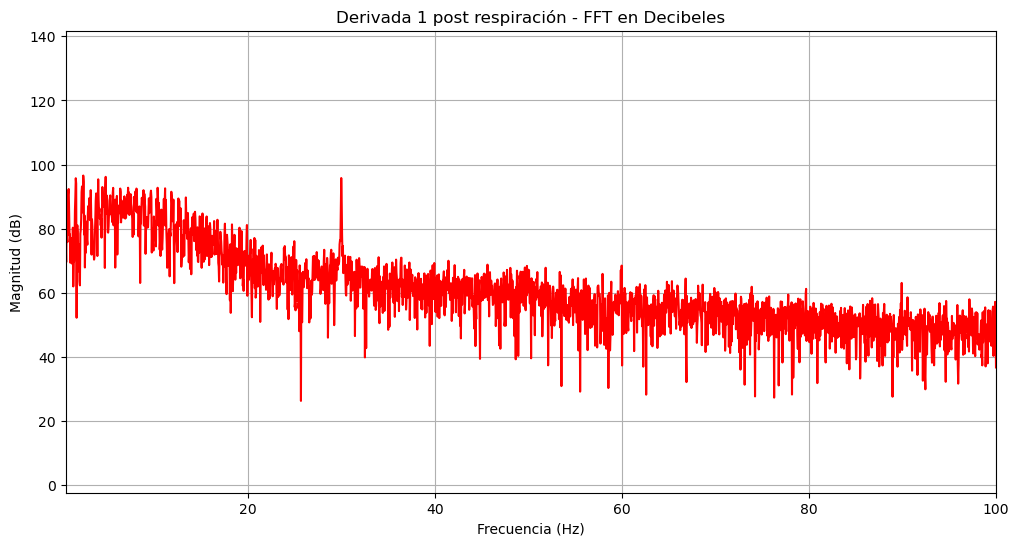

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data2 = np.loadtxt('C:/Users/Valeria Chavez/OneDrive/Escritorio/Signals/ECG_signals/postRespD1.txt', comments='#',skiprows=4)

# Extraer la data
postRespD1 = data2[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(postRespD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='r')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(postRespD1, 'Derivada 1 post respiración', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(postRespD1, 'Derivada 1 post respiración', fs)

Reposo basal post respiración - Primera derivada - filtrada

In [59]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Coeficientes del filtro FIR obtenidos de PyFDA para ECG
b_fir_ecg = [-0.02485, 0.0477, 0.09002, 0.1427, 0.1848, 0.2008, 0.1848, 0.1427, 0.09002, 0.0477, -0.02485]
a_fir_ecg = [1]  # Para FIR, el valor de a siempre es 1

# Coeficientes del filtro IIR obtenidos de PyFDA para ECG
b_iir_ecg = [0.004287, 0.01715, 0.02572, 0.01715, 0.004287]
a_iir_ecg = [1, -2.218, 1.977, -0.8251, 0.1346]

# Cargar la señal ECG (puedes adaptar el código para cargar tu archivo de señal)
# Aquí se asume que la variable 'ecg_signal' contiene tu señal de ECG

# Frecuencia de muestreo para ECG
sampling_rate_ecg = 1000  # Hz, ajusta si es diferente
n_samples_ecg = len(ecg_signal)
time_ecg = np.arange(n_samples_ecg) / sampling_rate_ecg

# Filtrar la señal con el filtro FIR para ECG
filtered_signal_fir_ecg = signal.lfilter(b_fir_ecg, a_fir_ecg, ecg_signal)

# Filtrar la señal con el filtro IIR para ECG
filtered_signal_iir_ecg = signal.lfilter(b_iir_ecg, a_iir_ecg, ecg_signal)

# Graficar las señales en el dominio del tiempo para ECG
plt.figure(figsize=(12, 8))

# Señal original en el dominio del tiempo
plt.subplot(3, 1, 1)
plt.plot(time_ecg, ecg_signal)
plt.title("Señal ECG Original en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.grid(True)

# Señal filtrada FIR en el dominio del tiempo
plt.subplot(3, 1, 2)
plt.plot(time_ecg, filtered_signal_fir_ecg)
plt.title("Señal ECG Filtrada FIR en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.grid(True)

# Señal filtrada IIR en el dominio del tiempo
plt.subplot(3, 1, 3)
plt.plot(time_ecg, filtered_signal_iir_ecg)
plt.title("Señal ECG Filtrada IIR en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'ecg_signal' is not defined